In [418]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm
from sklearn.preprocessing import LabelEncoder,Normalizer
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier

In [419]:
df_train= pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [420]:
df_train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [421]:
df_test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [422]:
df_train.shape

(891, 12)

In [423]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [424]:
df_train['Name'] = df_train['Name'].astype('str')

In [425]:
df_test['Name'] = df_test['Name'].astype('str')

In [426]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [427]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [428]:
mode_age_train = float(df_train['Age'].mode())
mode_age_train

24.0

In [429]:
df_train = df_train.fillna({'Age':mode_age_train})
df_test = df_test.fillna({'Age':mode_age_train})

In [430]:
df_train['Age'].isna().sum()

0

In [431]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [432]:
df_train = df_train.drop(['Cabin'],axis=1)
df_test = df_test.drop(['Cabin'],axis=1)
print(df_train.shape)
print(df_test.shape)

(891, 11)
(418, 10)


In [433]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [434]:
df_train = df_train.dropna(subset=['Embarked'])
df_train.shape

(889, 11)

In [435]:
df_train.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [436]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [437]:
fare_med_test = df_train['Fare'].mean()

In [438]:
df_test = df_test.fillna({'Fare':fare_med_test})

In [439]:
df_test.isna().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [440]:
'''cmap = cm.get_cmap('gnuplot')
scatter_plot = pd.plotting.scatter_matrix(df_train,c=df_train['Survived'],cmap=cmap,s=100,figsize=(20,20))'''

"cmap = cm.get_cmap('gnuplot')\nscatter_plot = pd.plotting.scatter_matrix(df_train,c=df_train['Survived'],cmap=cmap,s=100,figsize=(20,20))"

In [441]:
df_train['Name'].unique().shape

(889,)

As we can see form the Name column there are no duplicate values as well.

In [442]:
df_train = df_train.drop(['PassengerId'],axis=1)

In [443]:
df_train = df_train.drop(['Name'],axis=1)
df_test = df_test.drop(['Name'],axis=1)

In [444]:
df_train = df_train.drop(['Ticket'],axis=1)
df_test = df_test.drop(['Ticket'],axis=1)

In [445]:
labelenc = LabelEncoder()
labelenc.fit(df_train['Sex'])
df_train['Sex'] = labelenc.transform(df_train['Sex'])
df_test['Sex'] = labelenc.transform(df_test['Sex'])

In [446]:
labelenc = LabelEncoder()
labelenc.fit(df_train['Embarked'])
df_train['Embarked'] = labelenc.transform(df_train['Embarked'])
df_test['Embarked'] = labelenc.transform(df_test['Embarked'])

In [447]:
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [448]:
X = df_train[['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']]
y= df_train['Survived']

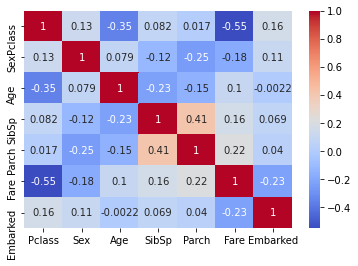

In [449]:
sns.heatmap(X.corr(),annot=True,cmap='coolwarm')
plt.show()

In [450]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,2
1,1,0,38.0,1,0,71.2833,0
2,3,0,26.0,0,0,7.9250,2
3,1,0,35.0,1,0,53.1000,2
4,3,1,35.0,0,0,8.0500,2


le = preprocessing.LabelEncoder()

le.fit(["paris", "paris", "tokyo", "amsterdam"])

LabelEncoder()

list(le.classes_)

['amsterdam', 'paris', 'tokyo']

le.transform(["tokyo", "tokyo", "paris"])

array([2, 2, 1]...)

list(le.inverse_transform([2, 2, 1]))

['tokyo', 'tokyo', 'paris']

We will use LabelEncoder on Sex column.

In [451]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    889 non-null    int64  
 1   Sex       889 non-null    int32  
 2   Age       889 non-null    float64
 3   SibSp     889 non-null    int64  
 4   Parch     889 non-null    int64  
 5   Fare      889 non-null    float64
 6   Embarked  889 non-null    int32  
dtypes: float64(2), int32(2), int64(3)
memory usage: 48.6 KB


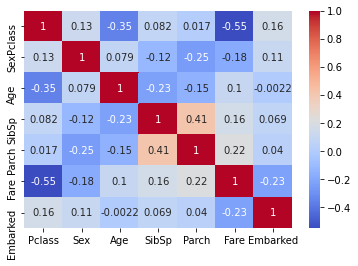

In [452]:
sns.heatmap(X.corr(),annot=True,cmap='coolwarm')
plt.show()

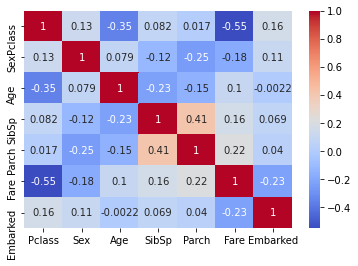

In [453]:
sns.heatmap(X.corr(),annot=True,cmap='coolwarm')
plt.show()

In [454]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,2
1,1,0,38.0,1,0,71.2833,0
2,3,0,26.0,0,0,7.9250,2
3,1,0,35.0,1,0,53.1000,2
4,3,1,35.0,0,0,8.0500,2


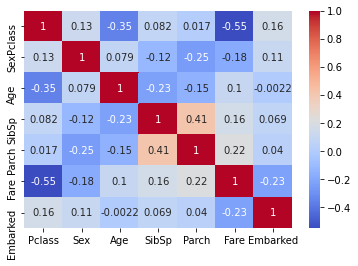

In [455]:
sns.heatmap(X.corr(),annot=True,cmap='coolwarm')
plt.show()

In [456]:
SEED = 42
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=SEED)

In [457]:
rf = RandomForestClassifier(random_state=SEED)
params = {'max_depth':np.arange(1,11,1),'n_estimators':[400],'min_samples_leaf':np.arange(0.1,0.2,0.01)}
gridsearch = GridSearchCV(rf,param_grid=params,cv=5,n_jobs=-1)

In [458]:
gridsearch.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
                         'min_samples_leaf': array([0.1 , 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19]),
                         'n_estimators': [400]})

In [459]:
best_rf = gridsearch.best_estimator_

In [460]:
best_rf.score(X_test,y_test)

0.8033707865168539

In [461]:
X_pred = df_test[['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']]

In [462]:
y_pred = best_rf.predict(X_pred)

In [463]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [464]:
import csv

In [483]:
file = open('submission.csv','w')
h = ['PassengerId','Survived']
out = csv.DictWriter(file,fieldnames=h,delimiter=',')
out.writeheader()
for i in range(0,len(y_pred)):
    out.writerow({'PassengerId':df_test.iloc[i,0],'Survived':y_pred[i]})
file.close()